# **Digit Recognition using Convolutional Neural Network (CNN)**

In [2]:
# load the dataset for keras
from keras.datasets import mnist

In [3]:
# split the datset as training and testing dataset
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


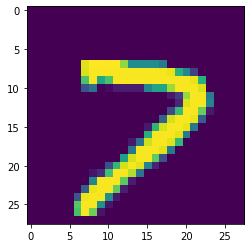

In [4]:
# visualize a sample from the training dataset
index=467
import matplotlib.pyplot as plt
plt.imshow(xtrain[index])

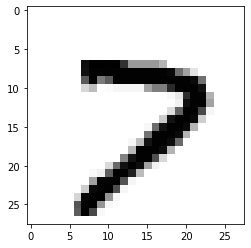

In [5]:
# image in greyscale
plt.imshow(xtrain[index],cmap='Greys')

In [6]:
# check the corresponding lable to the image
# digit shown in the image
ytrain[index]

7

Text(0.5, 1.0, 'A sample in the dataset')

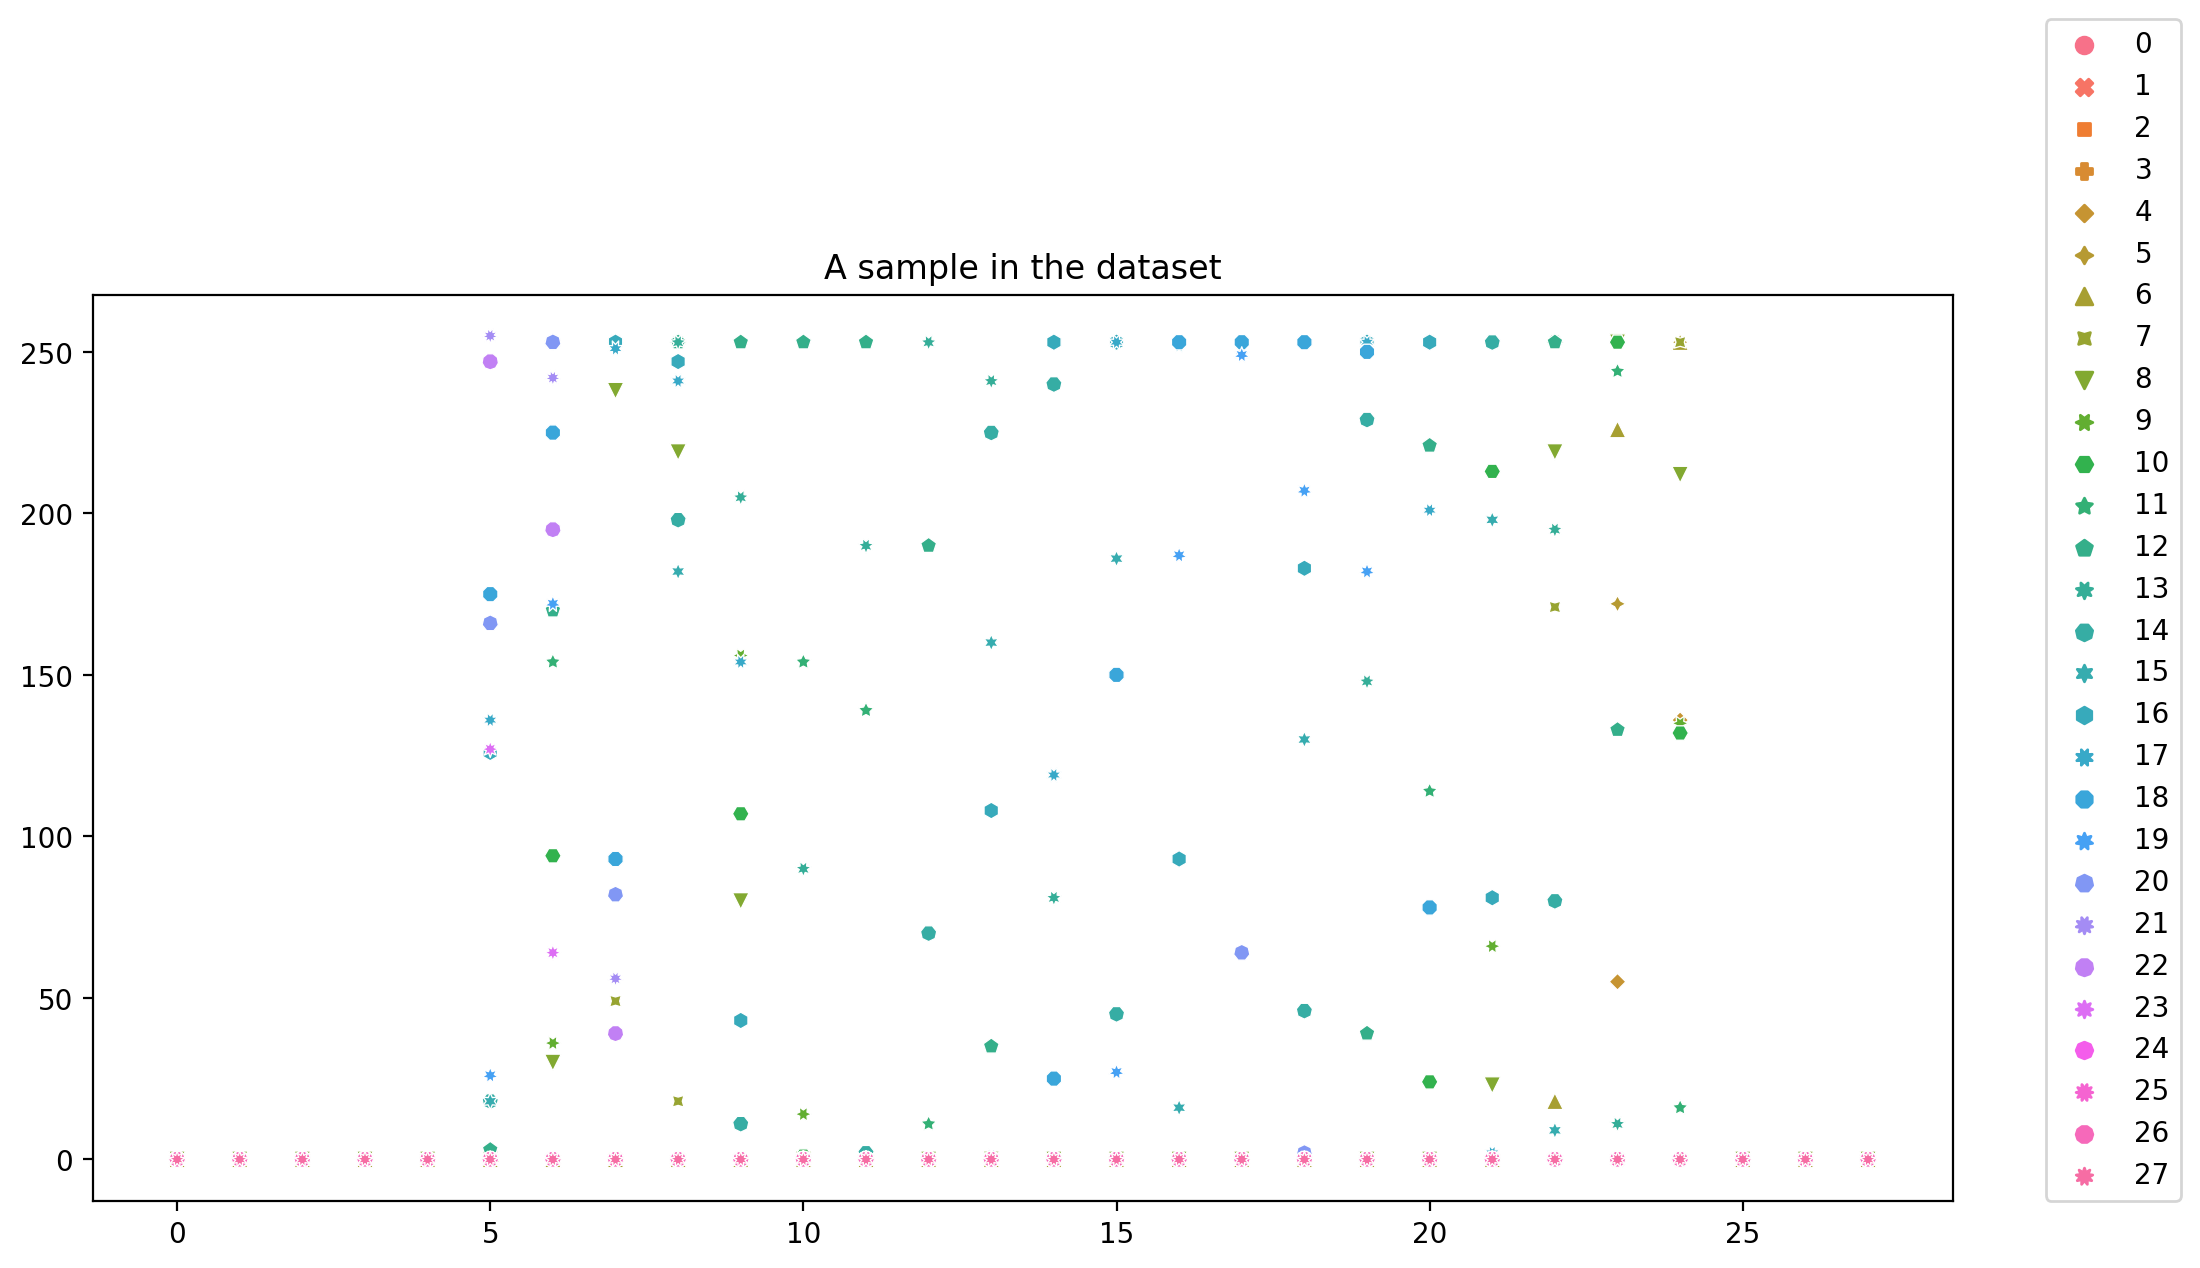

In [52]:
#visualize the input image as the RGB value of every pixel
import seaborn as sns
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=xtrain[0])
plt.legend(loc=(1.05,0))
plt.title("A sample in the dataset")
# plt.legend()

Text(0.5, 1.0, 'Output labels of the dataset')

<Figure size 2400x1200 with 0 Axes>

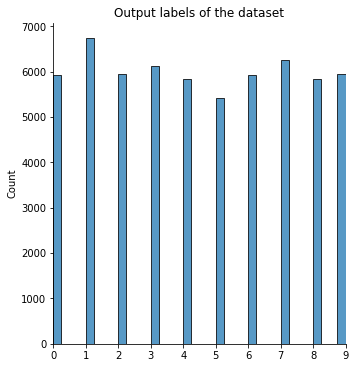

In [53]:
#visualize the output label of the dataset
plt.figure(figsize=(12,6),dpi=200)
sns.displot(data=ytrain)
plt.xlim(0,9)
plt.title("Output labels of the dataset")
# plt.legend()

In [9]:
# plt.figure(figsize=(12,6),dpi=200)
# sns.scatterplot(data=xtrain.reshape(-1,1))
# plt.xlim(0,9)

In [10]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.models import Sequential

In [11]:
# conv2d takes 3D image
# convert 2D image to 3D,
xtrain1=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest1=xtest.reshape(xtest.shape[0],28,28,1)
xtrain1.shape,xtest1.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
# create the model
model=Sequential()

In [13]:
# ********************CREATE THE CNN*************************** 

# add convolve layer
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))

#add Maxpool layer for Pooling
model.add(MaxPool2D(pool_size=(2,2)))

#eary stopping
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3,mode='auto',min_delta=0.001)

# ****************PASS THE CNN TO THE VENILLA DNN*****************

#flatten the feature map passed by the CNN
model.add(Flatten())

#add dense layer
model.add(Dense(128,activation='relu'))

#dropout 
model.add(Dropout(0.2))

#add output layer
model.add(Dense(10,activation='softmax'))

In [16]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
#train the model
hs=model.fit(xtrain,ytrain,epochs=1000,validation_data=(xtest,ytest),callbacks=[es])

Epoch 1/1000
1875/1875 [==============================] - 38s 20ms/step - loss: 0.7901 - accuracy: 0.8478 - val_loss: 0.2106 - val_accuracy: 0.9480
Epoch 2/1000
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2773 - accuracy: 0.9267 - val_loss: 0.1802 - val_accuracy: 0.9562
Epoch 3/1000
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2181 - accuracy: 0.9403 - val_loss: 0.1357 - val_accuracy: 0.9644
Epoch 4/1000
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2066 - accuracy: 0.9452 - val_loss: 0.1411 - val_accuracy: 0.9649
Epoch 5/1000
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1742 - accuracy: 0.9533 - val_loss: 0.1251 - val_accuracy: 0.9676
Epoch 6/1000
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1891 - accuracy: 0.9520 - val_loss: 0.1335 - val_accuracy: 0.9659
Epoch 7/1000
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1536 - accuracy: 0.9584 - val_

In [18]:
#predict from the trained model
a=model.predict(xtest1)

313/313 [==============================] - 2s 7ms/step


In [19]:
a.shape

(10000, 10)

In [21]:
# check the output of the 9th sample
b=a[9]

import numpy as np
j=np.argmax(b)
t=np.zeros(10)
t[j]=1
t.astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

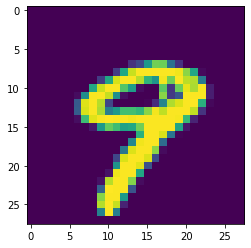

In [46]:
#sample image
plt.imshow(xtest[9])

In [23]:
print(f"Predicted label of the above image is {j}")

Predicted label of the above image is 9


In [24]:
xtest.shape

(10000, 28, 28)

In [27]:
ypred=model.predict(xtest1)

313/313 [==============================] - 2s 7ms/step


In [29]:
ypred.shape

(10000, 10)

In [47]:
#storing the labels of all the samples of the xtest
res=[]
for i in range(ypred.shape[0]):
    j=np.argmax(ypred[i])
    res.append(j)
res

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 9,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 8,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


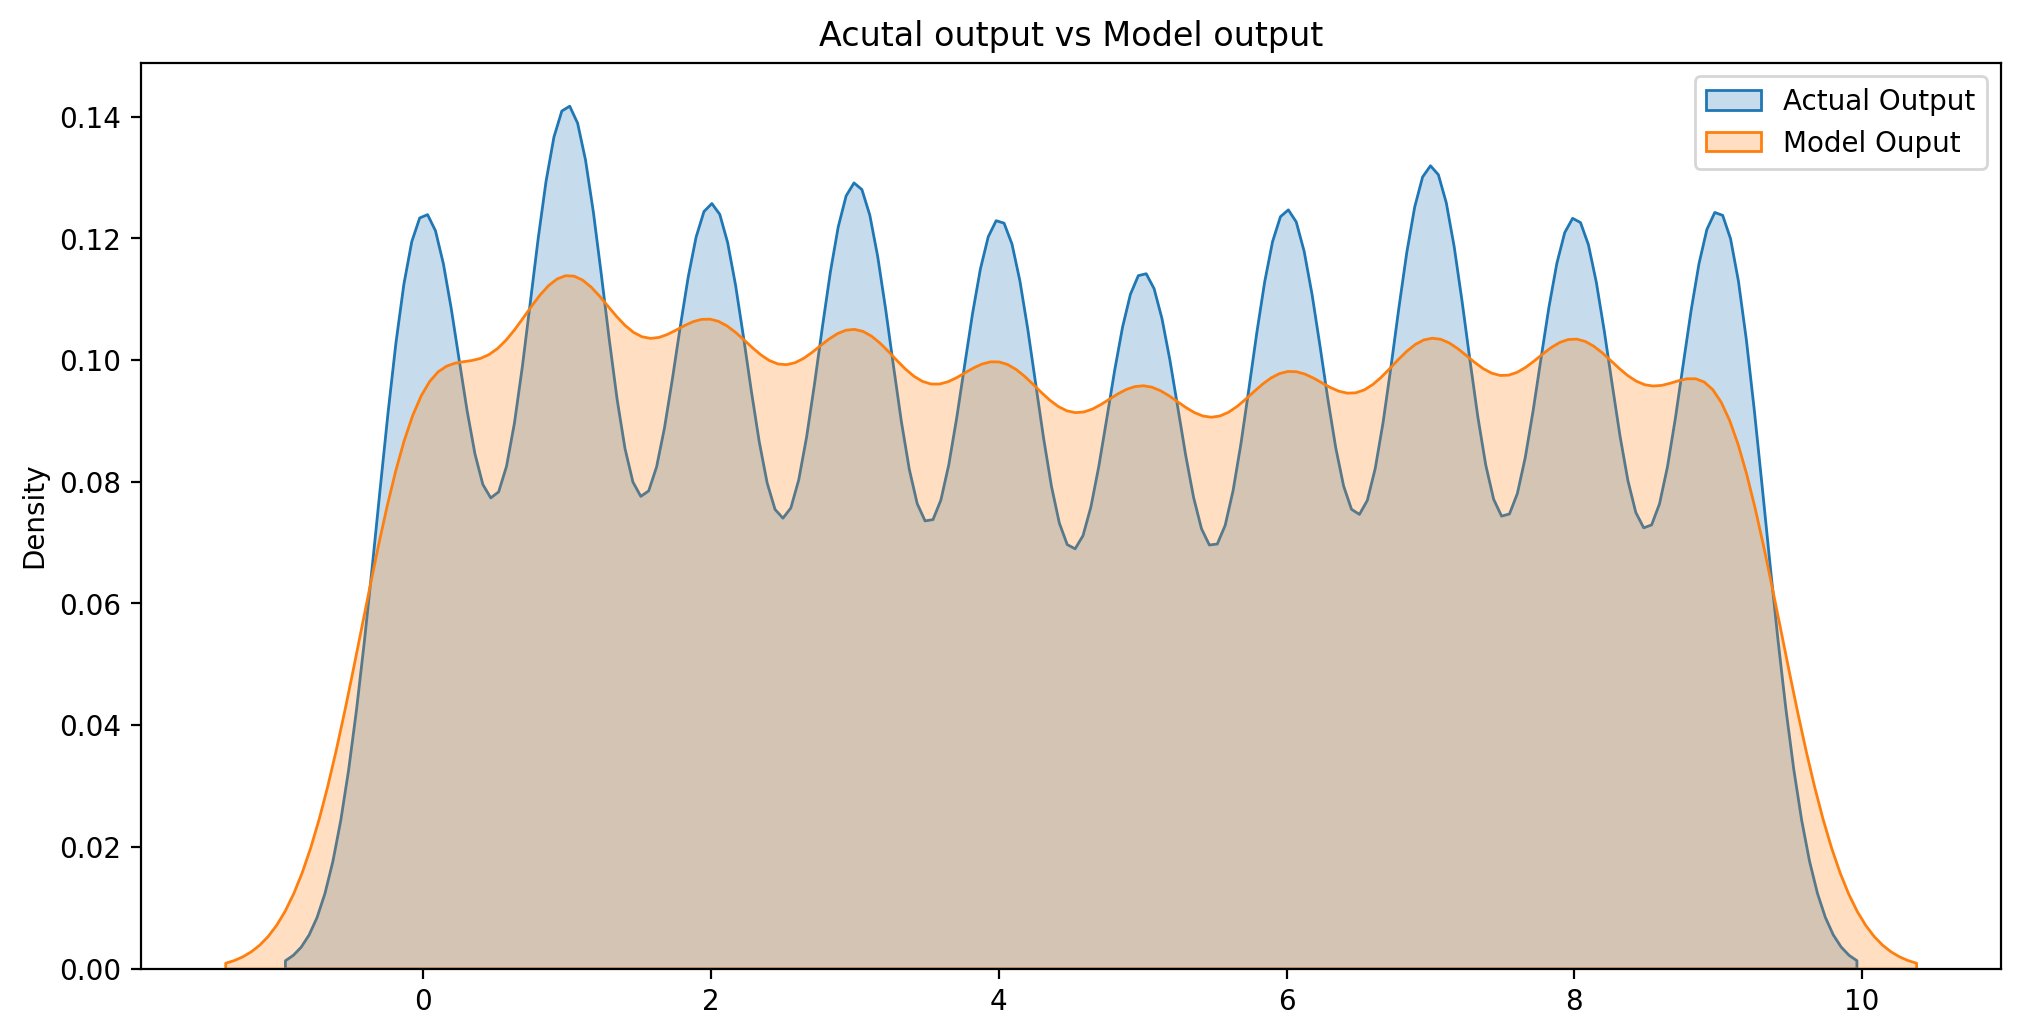

In [49]:
#comparing the model output and the actual output
plt.figure(figsize=(12,6),dpi=200)
sns.kdeplot(data=ytrain,fill=True,label='Actual Output')
sns.kdeplot(data=res,fill=True,label='Model Ouput')
plt.title("Acutal output vs Model output")
plt.legend()

Text(0.5, 1.0, 'Training loss vs Validation loss')

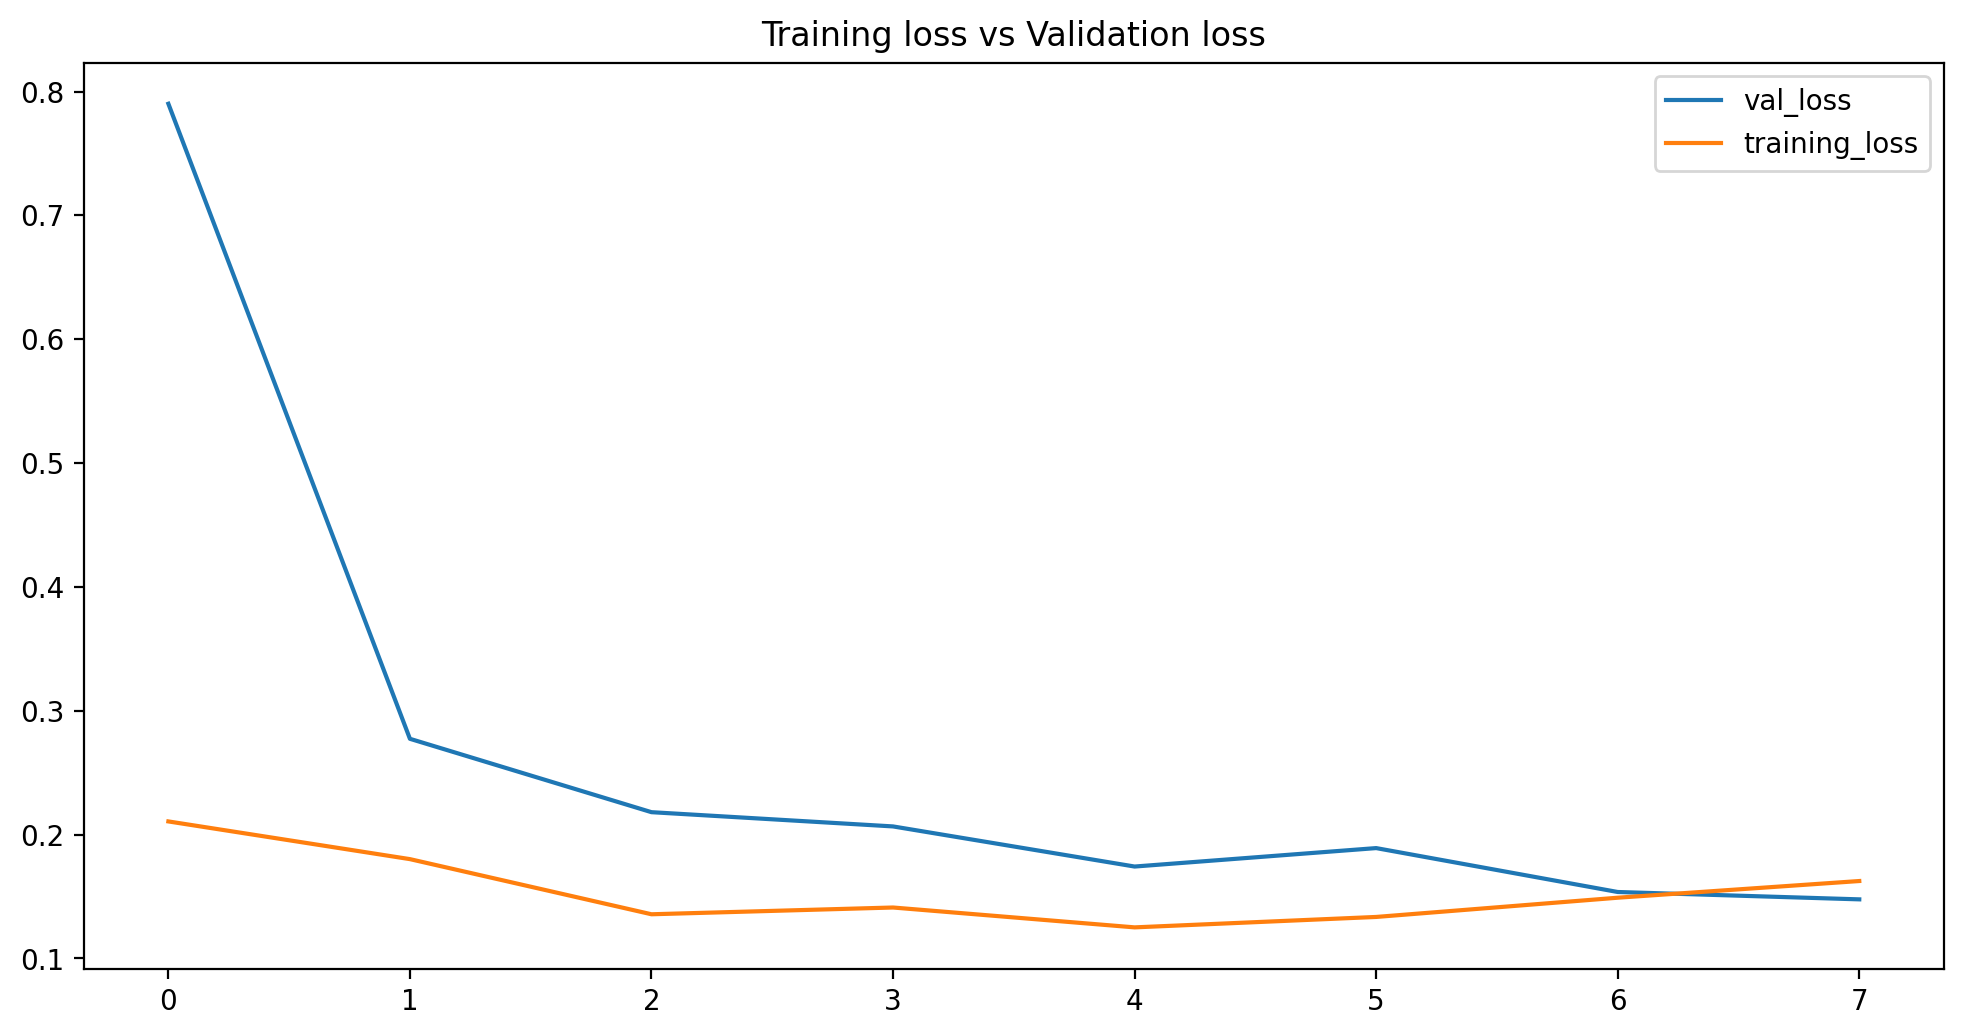

In [50]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(hs.history['loss'])
plt.plot(hs.history['val_loss'])
plt.legend(['val_loss','training_loss'])
plt.title("Training loss vs Validation loss")
# plt.legend()

Text(0.5, 1.0, 'Testing accuracy vs Validation accuracy')

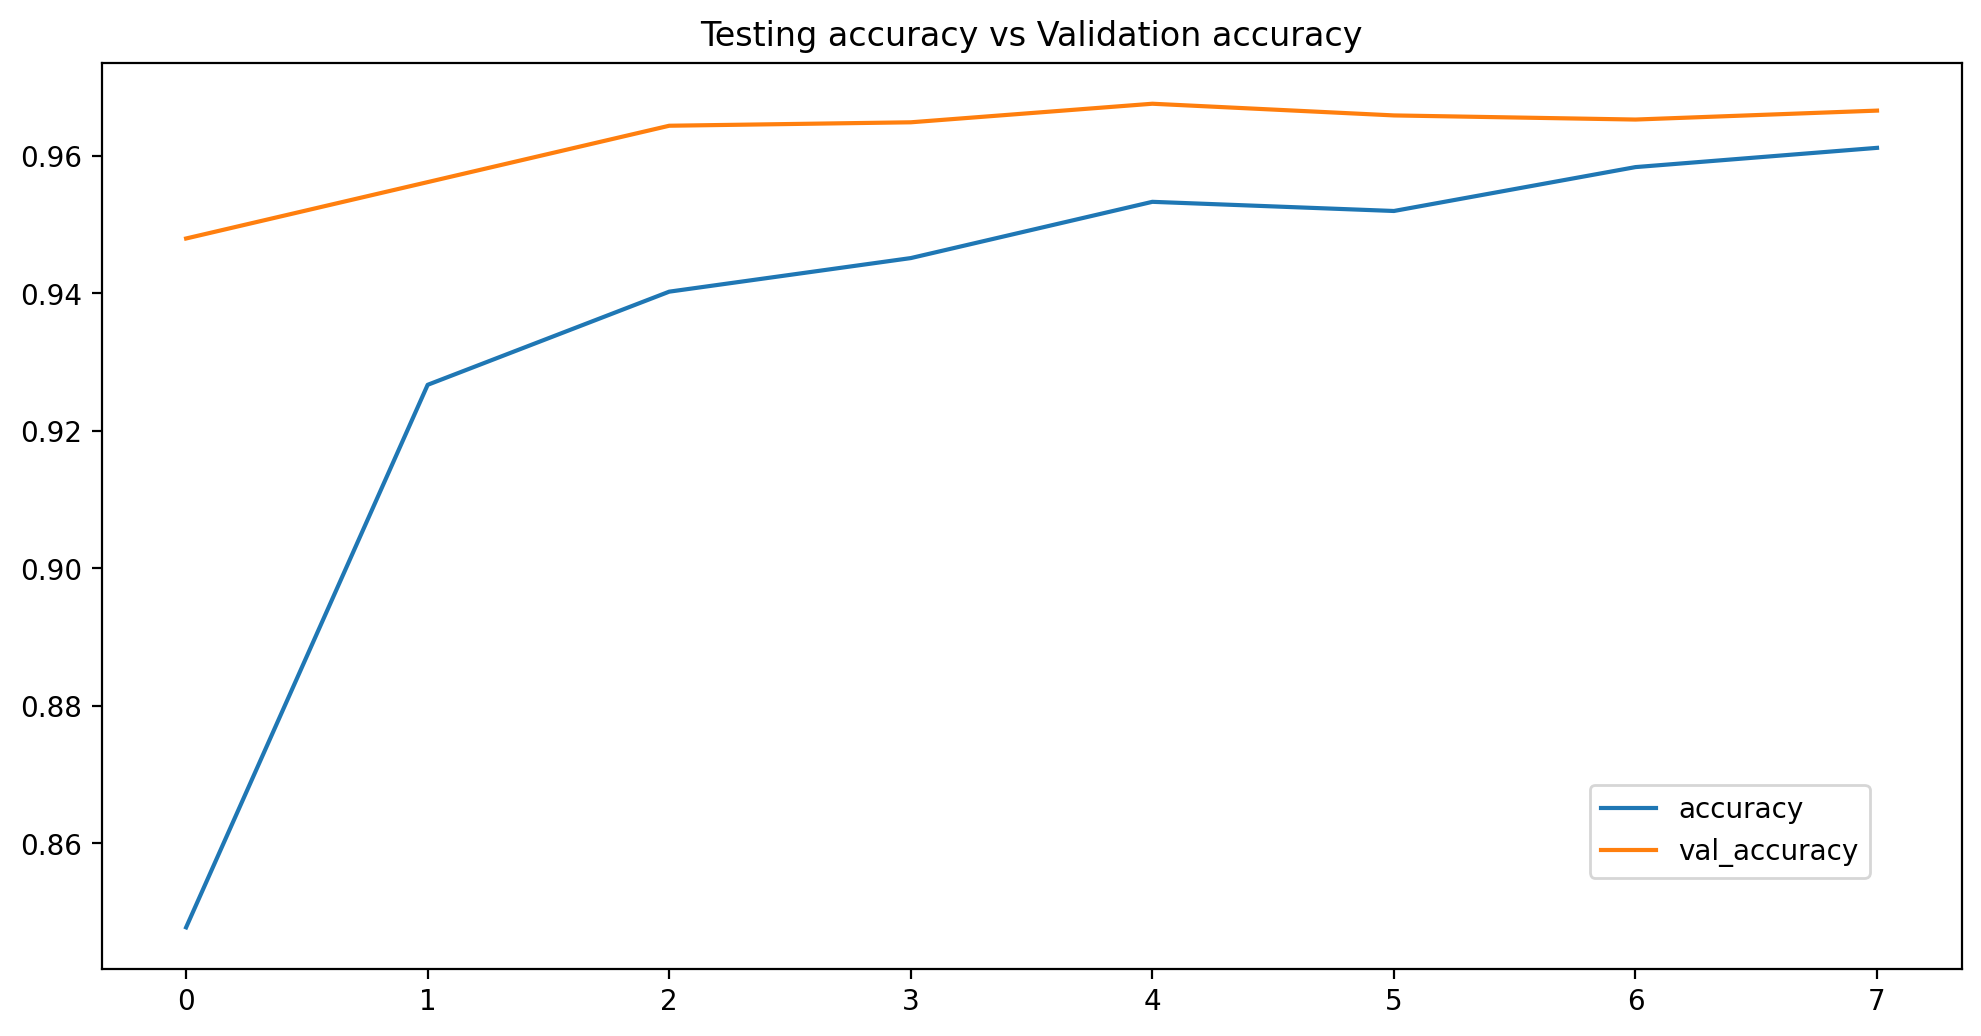

In [51]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc=(0.8,0.1))
plt.title("Testing accuracy vs Validation accuracy")
# plt.legend()